In [2]:
"""Count: GPT-3.5 joint accuracy."""
import os
import copy
import itertools
import numpy as np

size = 65
# result_folder = "results_65/prompt_ToMh"
# result_folder = 'API_responses'
result_folder = 'result_gpt-3.5-turbo-v0'
ans_folder = "data_ToMh_old"
acc = {}

def correct(result, choice, ans):
    if ans in result.lower() or choice in result:
        return 1
    return 0

# Iterate over all files and subdirectories within the root folder
for folder_name, subfolders, filenames in os.walk(result_folder):
    for filename in filenames:
        if filename.endswith(".txt"):
                ans_folder_name = folder_name.replace(result_folder, ans_folder)
                
                with open(os.path.join(ans_folder_name, filename), "r") as f:
                    output = f.read()
                    ans = output[output.find('Answer: '):]
                    ans = ans[:ans.find('\n')]
                    ans = ans.split()[-1]
                    choice = output[output.find('Choices:'):]
                    choice = choice[choice.find(ans)-3]
                    ans = ans.replace('_',' ')

                with open(os.path.join(folder_name, filename), "r") as f:
                    result = f.read()
                    result = result[-60:]
                    result = result.replace('_',' ')
                    choice_exist = result.find(choice)
                    acc_path  = os.path.join(folder_name, filename).replace(result_folder,'')
                    
                acc[acc_path] = correct(result, choice, ans)
# joint acc
joint_acc = copy.deepcopy(acc)
for key, value in acc.items():
    if value == 0:
        index = 2+key.find('r_')
        o = int(key[index]) + 1
        for i in range(o, 5):
            # print('r_'+key[index])
            new_k = key.replace('r_'+key[index], 'r_'+str(i))
            # print(key, new_k)
            joint_acc[new_k] = 0

tells = ['No_Tell', 'Tell']
prompts = ['CoT', 'MC']
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]

accuracy_data_3 = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}
joint_accuracy_data_3 = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}

for tell, prompt, length, order in itertools.product(tells, prompts, lengths, orders):
    acc_value = 0
    joint_acc_value = 0
    for sample_num in range(1, 21):
        acc_path = f'/{tell}/{prompt}/length_{length}/sample_{sample_num}/order_{order}.txt'
        acc_value += acc[acc_path]
        joint_acc_value += joint_acc[acc_path]

    accuracy_data_3[tell][prompt][length-1][order] = acc_value / 20
    joint_accuracy_data_3[tell][prompt][length-1][order] = joint_acc_value / 20

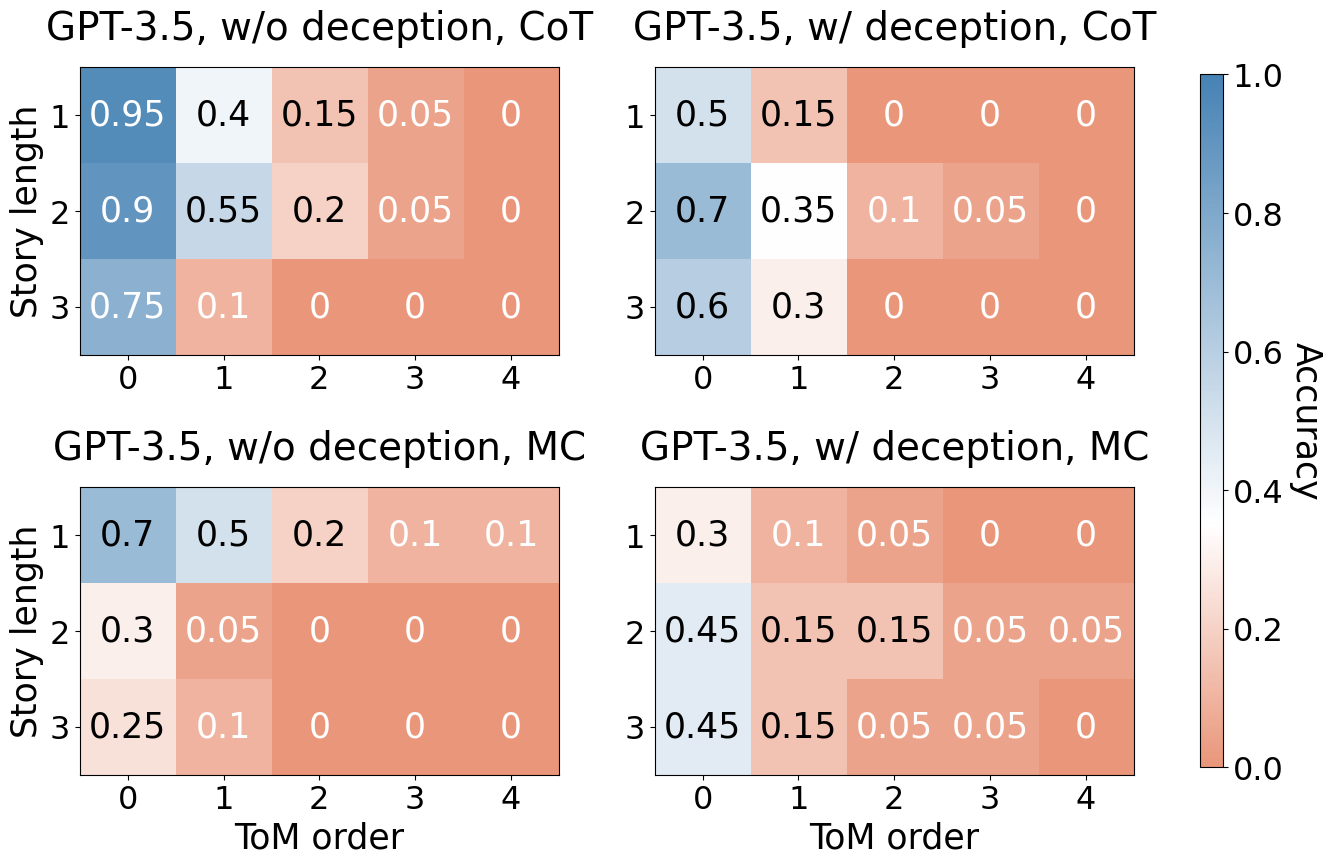

In [3]:
"""Plot: GPT-3.5 joint accuracy heatmap"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import itertools
import numpy as np
import pprint

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 28

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, '#c23728'), (0.05, '#e14b31'), (0.1, '#de6e56'), (0.2, '#e1a692'), (0.3, '#e2e2e2'), (0.6, '#a7d5ed'), (0.7, '#63bff0'), (0.8, '#22a7f0'), (1, '#1984c5')]
# colors = [(0, '#a2191f'), (0.13333333333333333, '#da1e28'), (0.2, '#fa4d56'), (0.26666666666666666, '#ff8389'), (0.3333333333333333, '#ffb3b8'), (0.4, '#ffd7d9'), (0.4666666666666667, '#fff1f1'), (0.5333333333333333, '#e5f6ff'), (0.6, '#bae6ff'), (0.6666666666666666, '#82cfff'), (0.7333333333333333, '#33b1ff'), (0.8, '#1192e8'), (0.8666666666666667, '#0072c3'), (0.9333333333333333, '#00539a'), (1.0, '#003a6d')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
# colors = [(0, 'indianred'), (0.1, 'indianred'), (0.2, 'lightcoral'), (0.3, 'mistyrose'), (0.4, 'white'), (1, 'steelblue')]
# colors = [(0, 'lightcoral'), (0.1, 'lightcoral'), (0.25, 'mistyrose'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.35, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

# for tell, prompt in itertools.product(tells, prompts):
#     fig, ax = plt.subplots(figsize=(8, 5))
#     im = ax.imshow(accuracy_data_3[tell][prompt], cmap=mpl.colormaps['Blues'])
#     # im = ax.imshow(accuracy_data_3[tell][prompt], cmap=cmap) # customize colormap

#     # Show all ticks and label them with the respective list entries
#     ax.set_xticks(np.arange(5), rotation=45)
#     ax.set_yticks(np.arange(3), labels=[1, 2, 3])
#     ax.set_xlabel('ToM order')
#     ax.set_ylabel('Story length')
#     cbar = ax.figure.colorbar(im, ax=ax)
#     cbar.ax.set_ylabel("Accuracy", rotation=-90, va="bottom")
#     communication = 'w/ deception' if tell == 'Tell' else 'w/o deception'
#     ax.set_title(f'{communication}, {prompt} prompting', fontsize=TITLE_FONT_SIZE)

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(),
#             rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(3):
#         for j in range(5):
#             rounded = np.round(accuracy_data_3[tell][prompt], 2)
#             fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < 0.7 else 'white'
#             text = ax.text(j, i, rounded[i][j],
#                         ha="center", va="center", color=fontcolor)

#     fig.tight_layout()
#     plt.savefig(f'data_figs/{tell}_{prompt}.pdf')

"""Plot 2 combined heatmaps"""
# Show all ticks and label them with the respective list entries
cmap = blueredcmap
fig, axs = plt.subplots(2, 2, figsize=(17,10))

im1 = axs[0][0].imshow(joint_accuracy_data_3['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data_3['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[1][0].imshow(joint_accuracy_data_3['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[1][1].imshow(joint_accuracy_data_3['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
for i, j in itertools.product(range(2), range(2)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    axs[1][j].set_xlabel('ToM order')
    axs[i][0].set_ylabel('Story length')
    communication = 'GPT-3.5, w/ deception, ' if j == 1 else 'GPT-3.5, w/o deception, '
    axs[i][j].set_title(communication+prompts[i], fontsize=TITLE_FONT_SIZE, pad=20)

# Loop over data dimensions and create text annotations.
for t, tell in enumerate(tells):
    for p, prompt in enumerate(prompts):
        rounded = np.round(joint_accuracy_data_3[tell][prompt], 2)
        for i in range(3):
            for j in range(5):
                fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < 0.75 and joint_accuracy_data_3[tell][prompt][i][j] > 0.1 else 'white'
                value = rounded[i][j] if rounded[i][j] != 0 else 0
                text = axs[p][t].text(j, i, value,
                            ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.9, aspect=30)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

plt.savefig(f'data_figs/CoT_heatmaps_GPT3.5.pdf')

In [4]:
"""Count: GPT-4 joint accuracy."""
import os
import sys
import copy
import itertools
import numpy as np
import pprint

input_folder = 'extracted_response'
answer_folder = 'data_ToMh_old'
response_folder = 'API_responses'
output_folder = 'check_GPT-4'
summary_file = 'GPT-4_data.txt'
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]
prompts = ['CoT', 'MC']
tells = ['No_Tell', 'Tell']
CoT_count, CoT_correct = [0, 0]
MC_count, MC_correct = [0, 0]
summary_lines = []
joint_accuracy_data = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}
joint_cnt_vs_deception = np.zeros((5, 7))
joint_correct_vs_deception = np.zeros((5, 7))
deception = set()

for tell, prompt, length in itertools.product(tells, prompts, lengths):
    
    total_count = np.zeros(5)
    correct_count = np.zeros(5)

    for sample_num in range(1, 21):
        correct_so_far = True
        for i, order in enumerate(orders):
            input_fn = os.path.join(input_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
            response_fn = os.path.join(response_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
            answer_fn = os.path.join(answer_folder, tell, 'CoT', f'length_{length}', f'sample_{sample_num}',
                                        f'order_{order}.txt')
            output_fn = os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                        f'order_{order}.txt')
            count_deception = 0
            with open(answer_fn, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    if 'Answer:' in line.split(' '):
                        correct_answer = line.split(' ', 1)[1].split('\n')[0]
                    if 'privately' in line.split(' '):
                        count_deception += 1
                    if 'publicly' in line.split(' '):
                        count_deception += 2
            
            joint_cnt_vs_deception[order][count_deception] += 1
            
            with open(input_fn, 'r') as file:
                lines = file.readlines()
                if len(lines[0].split(' ')) == 2:
                    answer_line = lines[0].split(' ')[1]
                else:
                    # print(f"Eliminated: {tell}, {prompt}, {length} chapters, {order} order, " , lines)
                    continue
            
            total_count[i] += 1
            if answer_line == correct_answer and correct_so_far:
                correct_count[i] += 1
                joint_correct_vs_deception[order][count_deception] += 1
            elif answer_line != correct_answer:
                correct_so_far = False
    for order in orders:
        joint_accuracy_data[tell][prompt][length - 1][order] = correct_count[order] / total_count[order]
# print(deception)
pprint.pprint(joint_accuracy_data)
# pprint.pprint(joint_cnt_vs_deception)
# pprint.pprint(joint_correct_vs_deception)

{'No_Tell': {'CoT': array([[1.        , 0.84210526, 0.7       , 0.45      , 0.35      ],
       [0.95      , 0.78947368, 0.5       , 0.2       , 0.1       ],
       [0.95      , 0.55      , 0.2       , 0.15789474, 0.15      ]]),
             'MC': array([[1.        , 0.7       , 0.5       , 0.45      , 0.4       ],
       [0.95      , 0.75      , 0.35      , 0.1       , 0.05      ],
       [0.93333333, 0.57894737, 0.2       , 0.15      , 0.15      ]])},
 'Tell': {'CoT': array([[1.        , 0.65      , 0.3       , 0.2       , 0.15      ],
       [1.        , 0.55      , 0.2       , 0.1       , 0.1       ],
       [1.        , 0.45      , 0.3       , 0.1       , 0.05263158]]),
          'MC': array([[1.        , 0.6       , 0.2       , 0.1       , 0.1       ],
       [1.        , 0.6       , 0.35      , 0.15      , 0.15      ],
       [0.95      , 0.4       , 0.21052632, 0.05      , 0.05      ]])}}


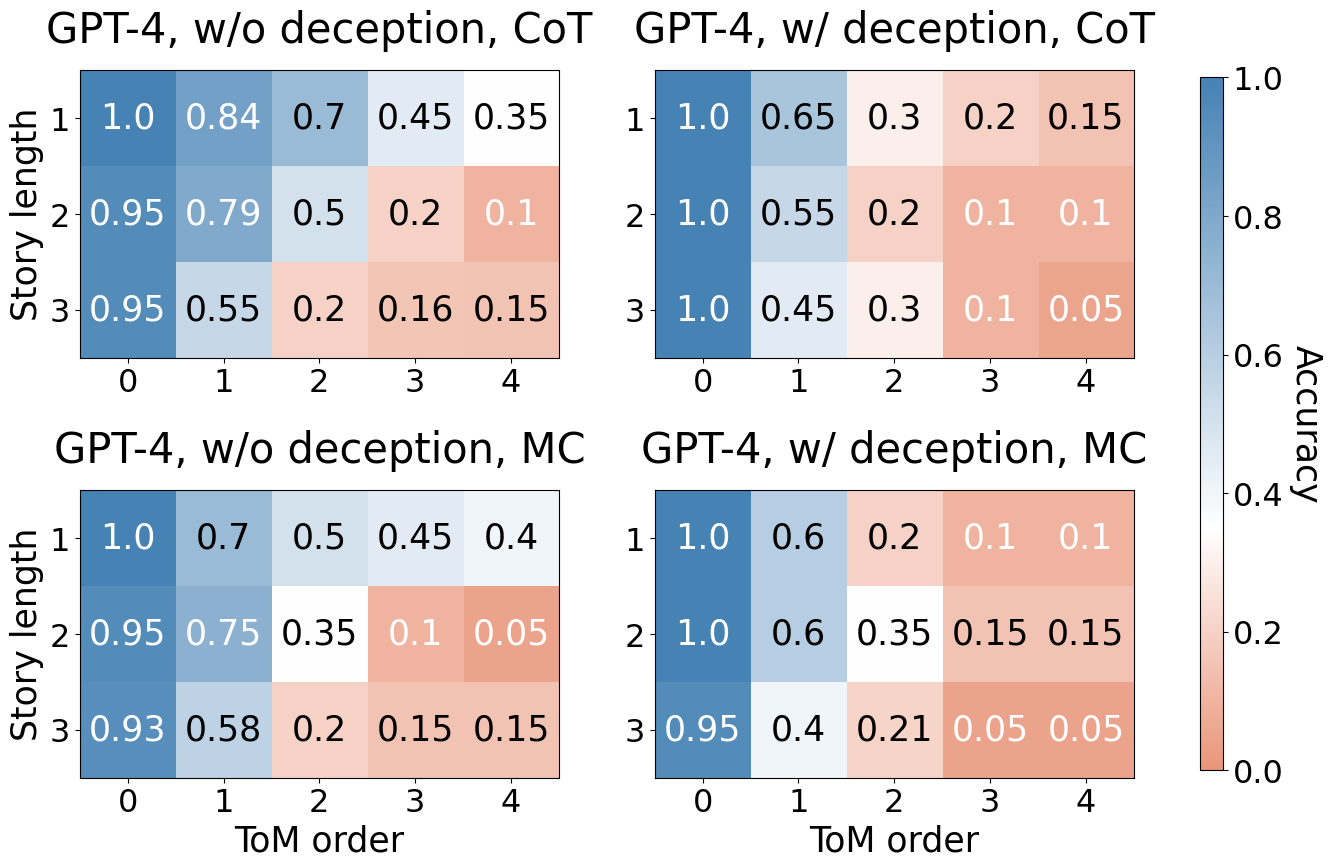

In [5]:
"""Plot: GPT-4 joint accuracy heatmap"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 30

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, 'darksalmon'), (0.1, 'peachpuff'), (0.2, 'seashell'), (0.25, 'white'), (1, 'steelblue')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.35, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

"""Plot 2 combined heatmaps"""

# Show all ticks and label them with the respective list entries
fig, axs = plt.subplots(2, 2, figsize=(17,10))
cmap = blueredcmap

im1 = axs[0][0].imshow(joint_accuracy_data['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[1][0].imshow(joint_accuracy_data['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[1][1].imshow(joint_accuracy_data['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
for i, j in itertools.product(range(2), range(2)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    axs[1][j].set_xlabel('ToM order')
    axs[i][0].set_ylabel('Story length')
    communication = 'GPT-4, w/ deception, ' if j == 1 else 'GPT-4, w/o deception, '
    axs[i][j].set_title(communication+prompts[i], fontsize=TITLE_FONT_SIZE, pad=20)

# Loop over data dimensions and create text annotations.
for t, tell in enumerate(tells):
    for p, prompt in enumerate(prompts):
        rounded = np.round(joint_accuracy_data[tell][prompt], 2)
        for i in range(3):
            for j in range(5):
                fontcolor = 'black' if joint_accuracy_data[tell][prompt][i][j] < 0.75 and joint_accuracy_data[tell][prompt][i][j] > 0.1 else 'white'
                value = rounded[i][j] if rounded[i][j] != 0 else 0
                text = axs[p][t].text(j, i, value,
                            ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.9, aspect=30)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")

plt.savefig(f'data_figs/CoT_heatmaps_GPT4.pdf')

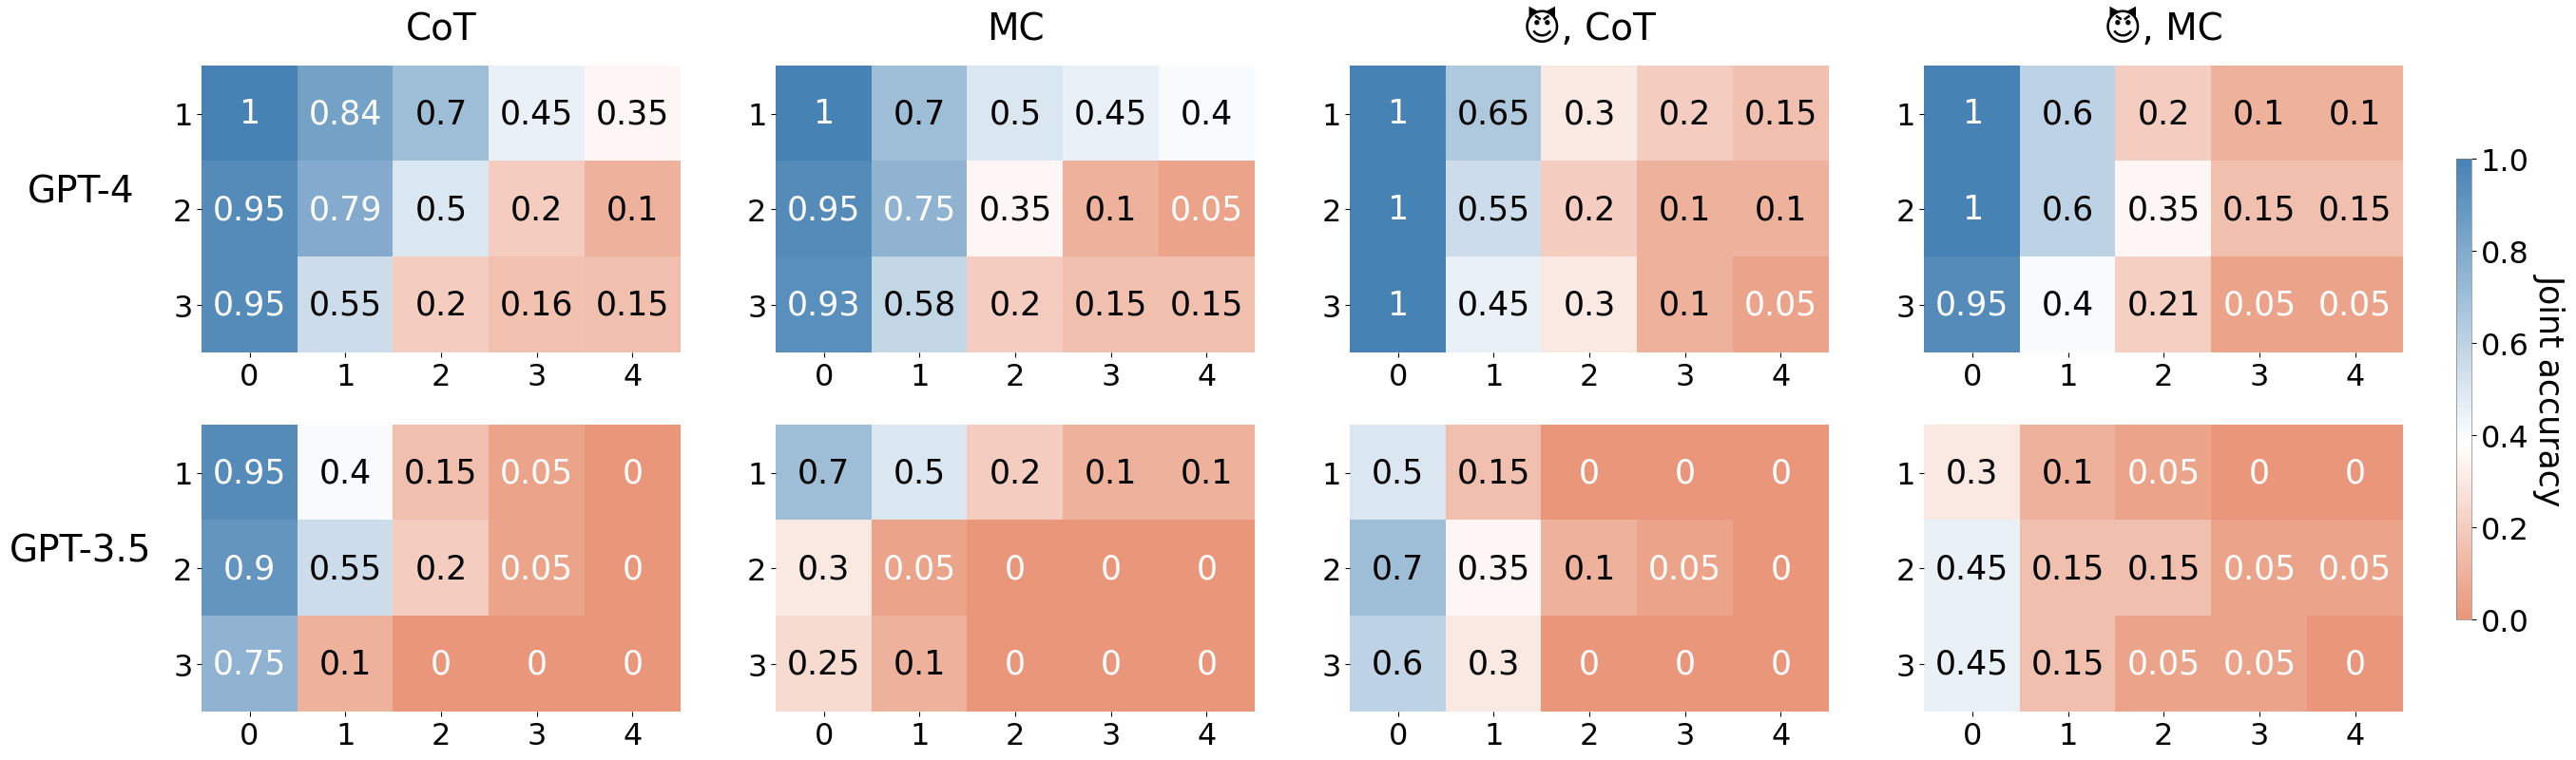

In [6]:
"""Plot: GPT-4 and GPT-3.5 joint accuracy heatmap"""
import numpy as np
import itertools
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 28

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, 'darksalmon'), (0.1, 'peachpuff'), (0.2, 'seashell'), (0.25, 'white'), (1, 'steelblue')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.38, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

"""Plot all combined heatmaps"""
# titles = np.array([['GPT-4, CoT', 'GPT-4, MC', '😈, GPT-4, CoT', '😈, GPT-4, MC'],
#             ['GPT-3.5, CoT', 'GPT-3.5, MC', '😈, GPT-3.5, CoT', '😈, GPT-3.5, MC']])
titles = np.array(['CoT', 'MC', '😈, CoT', '😈, MC'])

# Show all ticks and label them with the respective list entries
fig, axs = plt.subplots(2, 4, figsize=(36,9))
cmap = blueredcmap

im1 = axs[0][0].imshow(joint_accuracy_data['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(joint_accuracy_data['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[0][2].imshow(joint_accuracy_data['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[0][3].imshow(joint_accuracy_data['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)

im5 = axs[1][0].imshow(joint_accuracy_data_3['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im6 = axs[1][1].imshow(joint_accuracy_data_3['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im7 = axs[1][2].imshow(joint_accuracy_data_3['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im8 = axs[1][3].imshow(joint_accuracy_data_3['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)

for i, j in itertools.product(range(2), range(4)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    # axs[1][j].set_xlabel('ToM order')
    # axs[i][0].set_ylabel('Story length')
    axs[0][j].set_title(titles[j], fontsize=TITLE_FONT_SIZE, pad=20)
    for edge, spine in axs[i][j].spines.items():
            spine.set_visible(False)
axs[0][0].set_ylabel('GPT-4', rotation=0, labelpad=70, fontsize=TITLE_FONT_SIZE)
axs[1][0].set_ylabel('GPT-3.5', rotation=0, labelpad=70, fontsize=TITLE_FONT_SIZE)

# Loop over data dimensions and create text annotations.
black_range = [0.06, 0.75]
for k, (tell,prompt) in enumerate(itertools.product(tells,prompts)):
    rounded = np.round(joint_accuracy_data[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if joint_accuracy_data[tell][prompt][i][j] < black_range[1] and joint_accuracy_data[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            # value = '{:.2f}'.format(rounded[i][j])
            text = axs[0][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)
for k, (tell,prompt) in enumerate(itertools.product(tells,prompts)):
    rounded = np.round(joint_accuracy_data_3[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if joint_accuracy_data_3[tell][prompt][i][j] < black_range[1] and joint_accuracy_data_3[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            # value = '{:.2f}'.format(rounded[i][j])
            text = axs[1][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.7, aspect=30, pad=0.02)
cbar.ax.set_ylabel('Joint accuracy', rotation=-90, va="bottom")
cbar.outline.set_edgecolor('grey')
cbar.outline.set_linewidth(0.5)


plt.savefig(f'data_figs/CoT_heatmaps.pdf')

In [7]:
"""Count: GPT-4 accuracy"""
import os
import sys
import copy
import itertools
import numpy as np
import pprint

input_folder = 'extracted_response'
answer_folder = 'data_ToMh_old'
response_folder = 'API_responses'
output_folder = 'check_GPT-4'
summary_file = 'GPT-4_data.txt'
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]
prompts = ['CoT', 'MC']
tells = ['No_Tell', 'Tell']
CoT_count, CoT_correct = [0, 0]
MC_count, MC_correct = [0, 0]
summary_lines = []
accuracy_data = {'Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))},
                'No_Tell': {'CoT': np.zeros((3, 5)), 'MC': np.zeros((3, 5))}}
correctness_for_each = {'Tell': {'CoT': np.zeros((3, 5, 20)), 'MC': np.zeros((3, 5, 20))},
                'No_Tell': {'CoT': np.zeros((3, 5, 20)), 'MC': np.zeros((3, 5, 20))}}
cnt_vs_deception = np.zeros((5, 3))
correct_vs_deception = np.zeros((5, 3))

for tell, prompt, length, order in itertools.product(tells, prompts, lengths, orders):
    out_folder = os.path.join(output_folder, tell, prompt, f'length_{length}', f'order_{order}')
    summary_lines.append(f'{tell}, {prompt}, {length} chapters, {order} order: ')
    
    total_count = 0
    correct_count = 0

    for sample_num in range(1, 21):
        input_fn = os.path.join(input_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                f'order_{order}.txt')
        response_fn = os.path.join(response_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                f'order_{order}.txt')
        answer_fn = os.path.join(answer_folder, tell, 'CoT', f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
        output_fn = os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')

        with open(answer_fn, 'r') as file:
            output_lines = file.readlines()
        count_deception = 0
        with open(answer_fn, 'r') as file:
            lines = file.readlines()
            for line in lines:
                if 'Answer:' in line.split(' '):
                    correct_answer = line.split(' ', 1)[1].split('\n')[0]
                    output_lines.append('Correct answer: ' + correct_answer + '\n')
                if 'privately' in line.split(' ') or 'publicly' in line.split(' '):
                    count_deception += 1
        cnt_vs_deception[order][count_deception // 2] += 1
        
        with open(input_fn, 'r') as file:
            lines = file.readlines()
            if len(lines[0].split(' ')) == 2:
                answer_line = lines[0].split(' ')[1]
                output_lines.append('GPT-4 Answer: ' + answer_line + '\n')
            else:
                # print(f"Eliminated: {tell}, {prompt}, {length} chapters, {order} order, " , lines)
                continue
        with open(response_fn, 'r') as file:
            lines = file.readlines()
            output_lines.append('GPT-4 Explain: ')
            output_lines += lines
        
        total_count += 1
        if answer_line == correct_answer:
            correct_count += 1
            correct_vs_deception[order][count_deception // 2] += 1
        
        if True:
            if not os.path.exists(os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}')):
                os.makedirs(os.path.join(output_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}'))
            with open(output_fn, 'w') as file:
                file.writelines(output_lines)
    accuracy = correct_count / total_count
    summary_lines.append(str(accuracy) + '\n')
    accuracy_data[tell][prompt][length - 1][order] = accuracy
    with open(summary_file, 'w') as file:
        file.writelines(summary_lines)
# pprint.pprint(accuracy_data)
# pprint.pprint(cnt_vs_deception)
# pprint.pprint(correct_vs_deception)

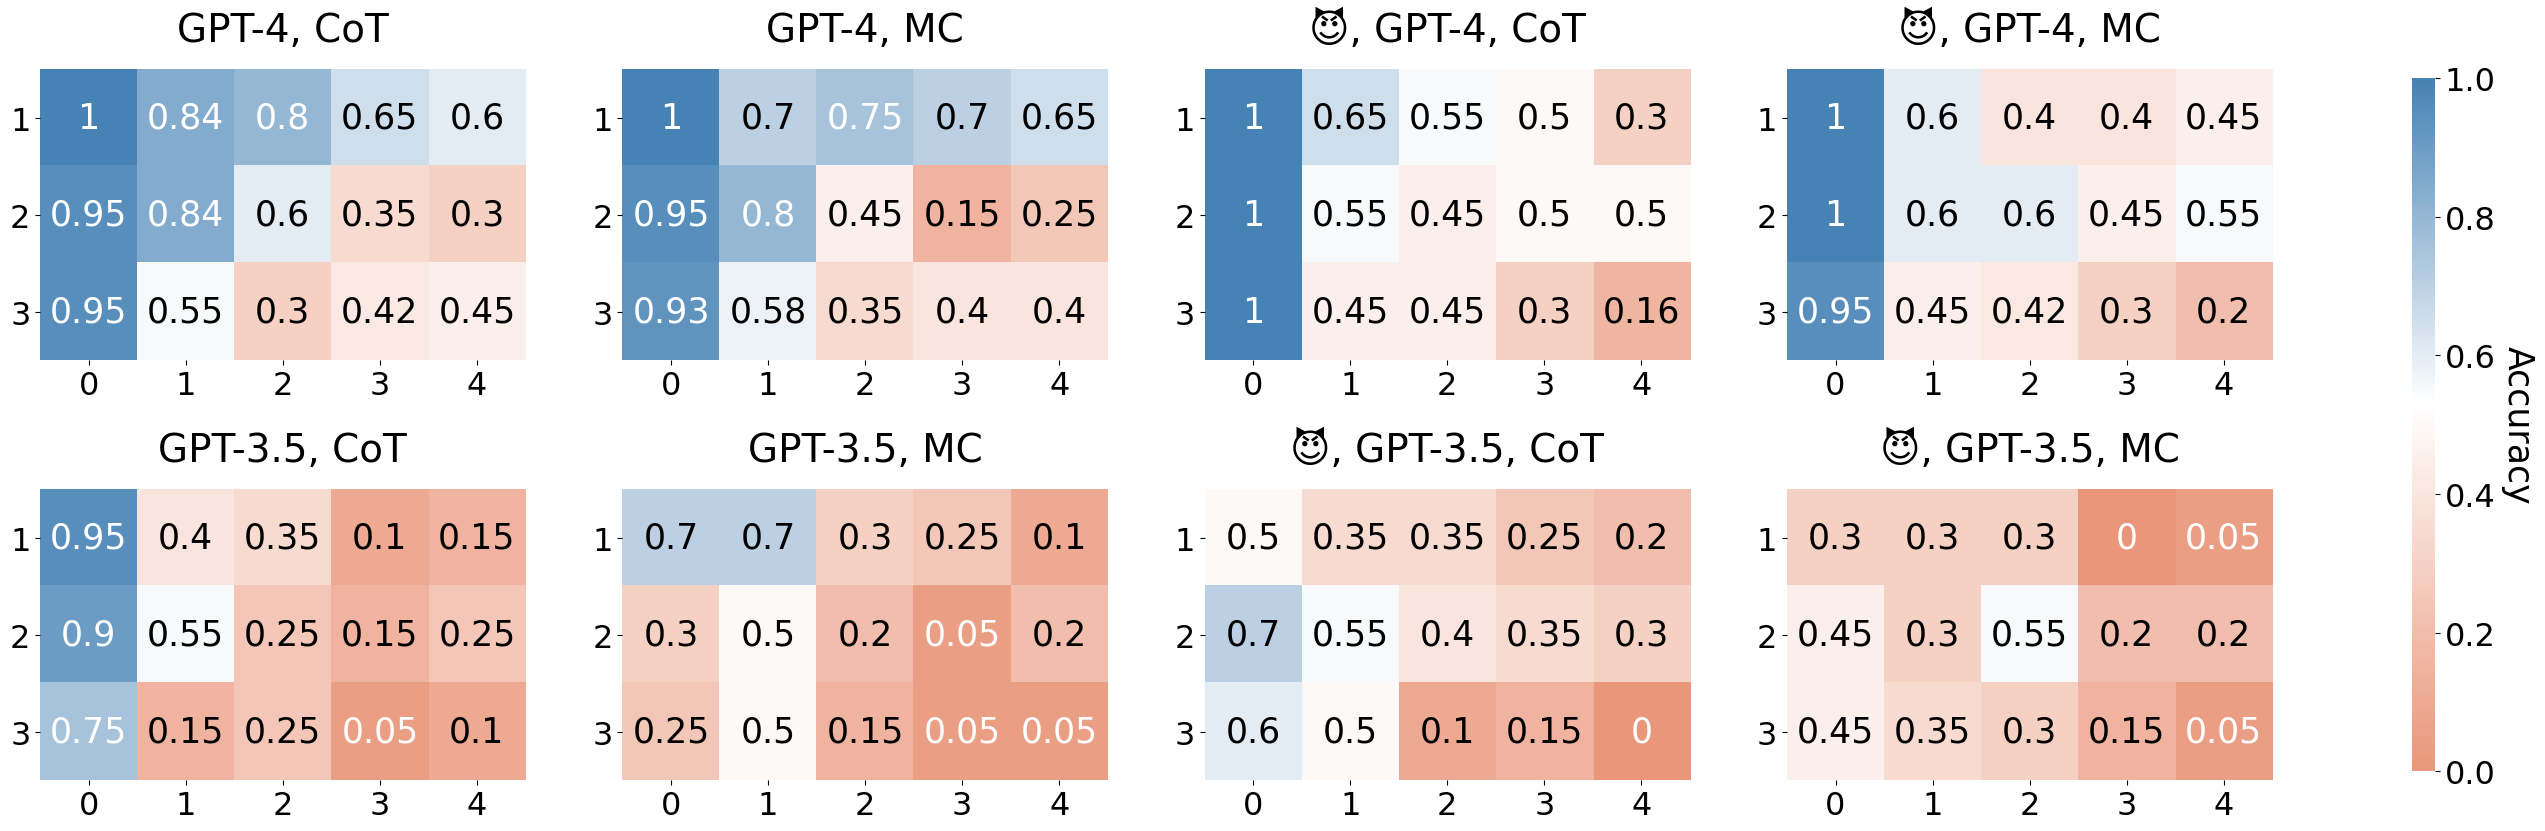

In [8]:
"""Plot: GPT-4 and GPT-3.5 accuracy heatmap"""
import numpy as np
import itertools
import matplotlib
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt

FONT_SIZE = 25
TICK_SIZE = 23
LEGEND_FONT_SIZE = 22
TITLE_FONT_SIZE = 28

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title
# plt.rcParams["font.family"] = "Times New Roman"
# colors = [(0, 'darksalmon'), (0.1, 'peachpuff'), (0.2, 'seashell'), (0.25, 'white'), (1, 'steelblue')]
# colors = [(0, 'darksalmon'), (0.1, 'darksalmon'), (0.2, 'peachpuff'), (0.25, 'seashell'), (0.35, 'white'), (1, 'steelblue')]
colors = [(0, 'darksalmon'), (0.53, 'white'), (1, 'steelblue')]

blueredcmap = mcolors.LinearSegmentedColormap.from_list(
    "mycmap", 
    colors
)

"""Plot all combined heatmaps"""
titles = np.array([['GPT-4, CoT', 'GPT-4, MC', '😈, GPT-4, CoT', '😈, GPT-4, MC'],
            ['GPT-3.5, CoT', 'GPT-3.5, MC', '😈, GPT-3.5, CoT', '😈, GPT-3.5, MC']])

# Show all ticks and label them with the respective list entries
fig, axs = plt.subplots(2, 4, figsize=(36,10))
cmap = blueredcmap

im1 = axs[0][0].imshow(accuracy_data['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im2 = axs[0][1].imshow(accuracy_data['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im3 = axs[0][2].imshow(accuracy_data['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im4 = axs[0][3].imshow(accuracy_data['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im5 = axs[1][0].imshow(accuracy_data_3['No_Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im6 = axs[1][1].imshow(accuracy_data_3['No_Tell']['MC'], cmap=cmap, vmin=0, vmax=1)
im7 = axs[1][2].imshow(accuracy_data_3['Tell']['CoT'], cmap=cmap, vmin=0, vmax=1)
im8 = axs[1][3].imshow(accuracy_data_3['Tell']['MC'], cmap=cmap, vmin=0, vmax=1)

for i, j in itertools.product(range(2), range(4)):
    axs[i][j].set_xticks(np.arange(5), rotation=45)
    axs[i][j].set_yticks(np.arange(3), labels=[1, 2, 3])
    # axs[1][j].set_xlabel('ToM order')
    # axs[i][0].set_ylabel('Story length')
    axs[i][j].set_title(titles[i][j], fontsize=TITLE_FONT_SIZE, pad=20)
    for edge, spine in axs[i][j].spines.items():
            spine.set_visible(False)

# Loop over data dimensions and create text annotations.
black_range = [0.06, 0.75]
for k, (tell,prompt) in enumerate(itertools.product(tells,prompts)):
    rounded = np.round(accuracy_data[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if accuracy_data[tell][prompt][i][j] < black_range[1] and accuracy_data[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            text = axs[0][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)
for k, (tell,prompt) in enumerate(itertools.product(tells,prompts)):
    rounded = np.round(accuracy_data_3[tell][prompt], 2)
    for i in range(3):
        for j in range(5):
            fontcolor = 'black' if accuracy_data_3[tell][prompt][i][j] < black_range[1] and accuracy_data_3[tell][prompt][i][j] > black_range[0] else 'white'
            value = rounded[i][j] if rounded[i][j] != 0 else 0
            value = value if rounded[i][j] != 1 else 1
            text = axs[1][k].text(j, i, value,
                        ha="center", va="center", color=fontcolor)

cbar = fig.colorbar(im1, ax=axs.ravel().tolist(), orientation='vertical', shrink=0.9, aspect=30)
cbar.ax.set_ylabel('Accuracy', rotation=-90, va="bottom")
cbar.outline.set_edgecolor('none')


plt.savefig(f'data_figs/CoT_heatmaps_accuracy.pdf')

In [9]:
"""Count GPT-4 annotation data."""
import os
import sys
import copy
import itertools
import numpy as np
import pprint

input_folder = 'annotation_GPT-4'
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]
prompts = ['CoT', 'MC']
tells = ['No_Tell', 'Tell']
total_cnt = {'No_Tell': np.zeros(5), 'Tell': np.zeros(5)}
error_cnt = {'No_Tell': np.zeros((5, 9)), 'Tell': np.zeros((5, 9))}
error_ratio = {'No_Tell': np.zeros((5, 9)), 'Tell': np.zeros((5, 9))}
error_ratio_all = np.zeros((5, 9))
fully_correct_cnt = {'No_Tell': np.zeros(5), 'Tell': np.zeros(5)}
fully_correct_ratio = {'No_Tell': np.zeros(5), 'Tell': np.zeros(5)}

for tell, prompt, length in itertools.product(tells, prompts, lengths):
    for sample_num in range(1, 21):
        correct_so_far = True
        for i, order in enumerate(orders):
            input_fn = os.path.join(input_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
            if not os.path.exists(input_fn):
                continue
            
            with open(input_fn, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    if 'a:' in line.split(' '):
                        total_cnt[tell][order] += 1
                        error_types = line.split()[1:]
                        if not error_types:
                            fully_correct_cnt[tell][order] += 1
                        for i in range(9):
                            if i not in [3, 4]:
                                if str(i + 1) in error_types:
                                    error_cnt[tell][order][i] += 1
                        if str(4) in error_types or str(5) in error_types:
                            error_cnt[tell][order][3] += 1
            
            if answer_line != correct_answer:
                correct_so_far = False
for tell in tells:
    for order in orders:
        error_ratio[tell][order] = error_cnt[tell][order] / total_cnt[tell][order]
        fully_correct_ratio[tell][order] = fully_correct_cnt[tell][order] / total_cnt[tell][order]

for order in orders:
    error_ratio_all[order] = (error_cnt['No_Tell'][order] + error_cnt['Tell'][order]) / (total_cnt['No_Tell'][order] + total_cnt['Tell'][order])

error_ratio['No_Tell'] = np.transpose(error_ratio['No_Tell'], (1, 0))
error_ratio['Tell'] = np.transpose(error_ratio['Tell'], (1, 0))
error_ratio_all = np.transpose(error_ratio_all)
print(error_ratio_all)

[[0.02941176 0.08823529 0.11764706 0.26470588 0.33333333]
 [0.         0.         0.05882353 0.44117647 0.63636364]
 [0.         0.         0.11764706 0.08823529 0.        ]
 [0.08823529 0.23529412 0.32352941 0.52941176 0.54545455]
 [0.         0.         0.         0.         0.        ]
 [0.         0.05882353 0.17647059 0.17647059 0.42424242]
 [0.         0.11764706 0.08823529 0.02941176 0.06060606]
 [0.         0.         0.         0.         0.        ]
 [0.02941176 0.08823529 0.20588235 0.44117647 0.51515152]]


In [10]:
"""Count GPT-3.5 annotation data."""
import os
import sys
import copy
import itertools
import numpy as np
import pprint

input_folder = 'annotation_GPT-3.5-turbo'
lengths = [1, 2, 3]
orders = [0, 1, 2, 3, 4]
prompts = ['CoT', 'MC']
tells = ['No_Tell', 'Tell']
total_cnt_3 = {'No_Tell': np.zeros(5), 'Tell': np.zeros(5)}
error_cnt_3 = {'No_Tell': np.zeros((5, 9)), 'Tell': np.zeros((5, 9))}
error_ratio_3 = {'No_Tell': np.zeros((5, 9)), 'Tell': np.zeros((5, 9))}
error_ratio_all_3 = np.zeros((5, 9))
fully_correct_cnt_3 = {'No_Tell': np.zeros(5), 'Tell': np.zeros(5)}
fully_correct_ratio_3 = {'No_Tell': np.zeros(5), 'Tell': np.zeros(5)}

for tell, prompt, length in itertools.product(tells, prompts, lengths):
    for sample_num in range(1, 21):
        correct_so_far = True
        for i, order in enumerate(orders):
            input_fn = os.path.join(input_folder, tell, prompt, f'length_{length}', f'sample_{sample_num}',
                                    f'order_{order}.txt')
            if not os.path.exists(input_fn):
                continue
            
            with open(input_fn, 'r') as file:
                lines = file.readlines()
                for line in lines:
                    if 'a:' in line.split(' '):
                        total_cnt_3[tell][order] += 1
                        error_types = line.split()[1:]
                        if not error_types:
                            fully_correct_cnt_3[tell][order] += 1
                        for i in range(9):
                            if i not in [3, 4]:
                                if str(i + 1) in error_types:
                                    error_cnt_3[tell][order][i] += 1
                        if str(4) in error_types or str(5) in error_types:
                            error_cnt_3[tell][order][3] += 1
            
            if answer_line != correct_answer:
                correct_so_far = False
for tell in tells:
    for order in orders:
        error_ratio_3[tell][order] = error_cnt_3[tell][order] / total_cnt_3[tell][order]
        fully_correct_ratio_3[tell][order] = fully_correct_cnt_3[tell][order] / total_cnt_3[tell][order]

for order in orders:
    error_ratio_all_3[order] = (error_cnt_3['No_Tell'][order] + error_cnt_3['Tell'][order]) / (total_cnt_3['No_Tell'][order] + total_cnt_3['Tell'][order])

error_ratio_3['No_Tell'] = np.transpose(error_ratio_3['No_Tell'], (1, 0))
error_ratio_3['Tell'] = np.transpose(error_ratio_3['Tell'], (1, 0))
error_ratio_all_3 = np.transpose(error_ratio_all_3)
print(error_ratio_all_3)

[[0.05555556 0.11111111 0.44444444 0.44444444 0.33333333]
 [0.05555556 0.05555556 0.11111111 0.83333333 0.77777778]
 [0.05555556 0.05555556 0.         0.         0.        ]
 [0.16666667 0.38888889 0.72222222 0.88888889 0.77777778]
 [0.         0.         0.         0.         0.        ]
 [0.11111111 0.44444444 0.72222222 0.77777778 0.83333333]
 [0.33333333 0.55555556 0.66666667 0.61111111 0.77777778]
 [0.         0.         0.         0.         0.        ]
 [0.11111111 0.38888889 0.55555556 0.61111111 0.66666667]]


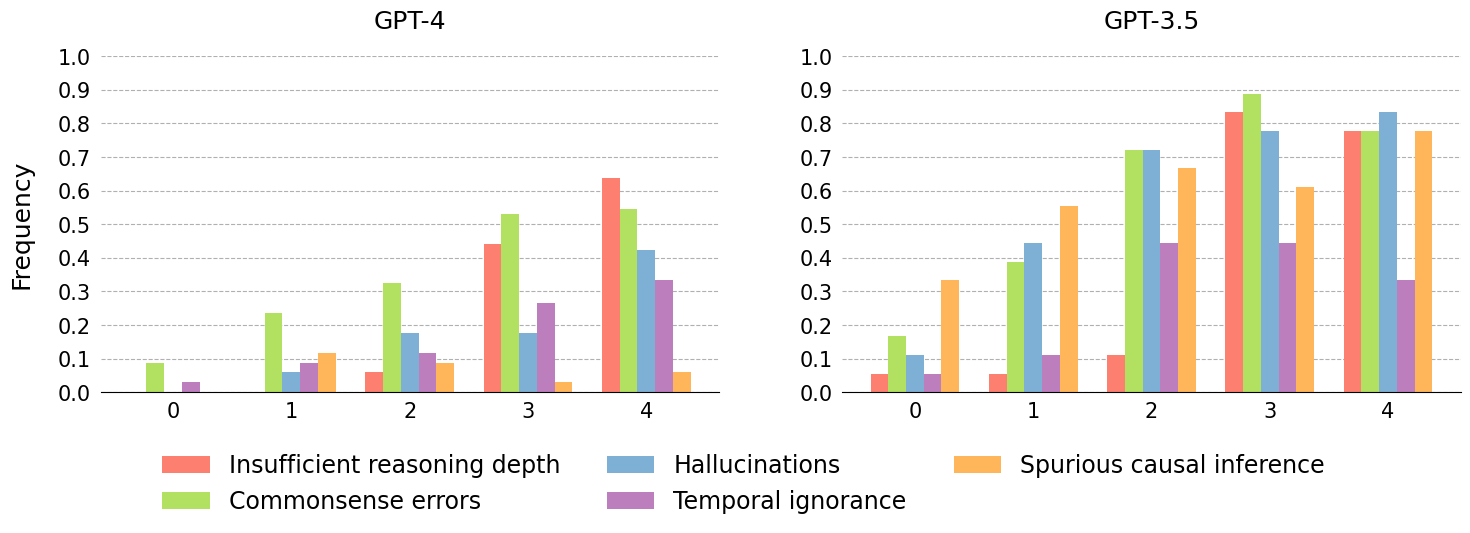

In [11]:
"""Plot: Ratio of correct/incorrect answer in first-container answers"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
FONT_SIZE = 18
TICK_SIZE = 15
LEGEND_FONT_SIZE = 17

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title

titles = ['GPT-4', 'GPT-3.5']
# cols = ['#7C84B9', (1, 0.851, 0.4), 'steelblue']
cols = ["#fd7f6f", "#b2e061", "#7eb0d5", "#bd7ebe", "#ffb55a", "#00bfa0", "#ffee65", "#fdcce5", "#8bd3c7"]
# cols = [(253, 127, 111), (126, 176, 213), (178, 224, 97), (189, 126, 190), (255, 181, 90), (0, 191, 160), (255, 238, 101), (253, 204, 229), (139, 211, 199)]
error_ratio_chosen_3 = None
error_ratio_chosen = None
error_ratio_chosen_3 = [error_ratio_all_3[i] for i in range(9) if i not in [2, 4, 7]]
error_ratio_chosen = [error_ratio_all[i] for i in range(9) if i not in [2, 4, 7]]

# pprint.pprint(error_ratio_chosen_3)
# Set the positions of the bars
x = np.arange(5)
width = 0.15

# Create the bar chart
fig, axs = plt.subplots(1, 2, figsize=(17, 6))
axs[0].bar(x - 2*width,  error_ratio_chosen[1], width, label='Insufficient reasoning depth', zorder=2, color=cols[0])
axs[0].bar(x - width, error_ratio_chosen[2], width, label='Commonsense errors', zorder=2, color=cols[1])
axs[0].bar(x, error_ratio_chosen[3], width, label='Hallucinations', zorder=2, color=cols[2])
axs[0].bar(x + width, error_ratio_chosen[0], width, label='Temporal ignorance', zorder=2, color=cols[3])
axs[0].bar(x + 2*width, error_ratio_chosen[4], width, label='Spurious causal inference', zorder=2, color=cols[4])

axs[1].bar(x - 2*width,  error_ratio_chosen_3[1], width, label='Insufficient reasoning depth', zorder=2, color=cols[0])
axs[1].bar(x - width, error_ratio_chosen_3[2], width, label='Commonsense errors', zorder=2, color=cols[1])
axs[1].bar(x, error_ratio_chosen_3[3], width, label='Hallucinations', zorder=2, color=cols[2])
axs[1].bar(x + width, error_ratio_chosen_3[0], width, label='Temporal ignorance', zorder=2, color=cols[3])
axs[1].bar(x + 2*width, error_ratio_chosen_3[4], width, label='Spurious causal inference', zorder=2, color=cols[4])

# Add labels and title
# plt.xlabel('ToM order')
# plt.ylabel('Frequency')
# plt.title('Bar Chart with Two Columns')
for i in range(2):
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['bottom'].set_visible(True)
    axs[i].grid(axis='y', linestyle='dashed', zorder=1)
    axs[i].set_ylim(0,1)
    axs[0].set_ylabel('Frequency', labelpad=17)
    # axs[i].set_xlabel('ToM order')
    axs[i].set_xticks([0,1,2,3,4])
    axs[i].set_yticks([0 ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    axs[i].tick_params(bottom=False, left=False)
    axs[i].set_title(titles[i], pad=20)

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(-0.16, -0.12), ncol=3, frameon=False)
plt.subplots_adjust(bottom=0.34, top=0.9, left=0.15, right=0.95)

# Display the plot
plt.savefig(f'data_figs/error_types.pdf')
plt.show()


[array([0.05555556, 0.11111111, 0.44444444, 0.44444444, 0.33333333]),
 array([0.05555556, 0.05555556, 0.11111111, 0.83333333, 0.77777778]),
 array([0.16666667, 0.38888889, 0.72222222, 0.88888889, 0.77777778]),
 array([0.11111111, 0.44444444, 0.72222222, 0.77777778, 0.83333333]),
 array([0.33333333, 0.55555556, 0.66666667, 0.61111111, 0.77777778]),
 array([0.11111111, 0.38888889, 0.55555556, 0.61111111, 0.66666667])]


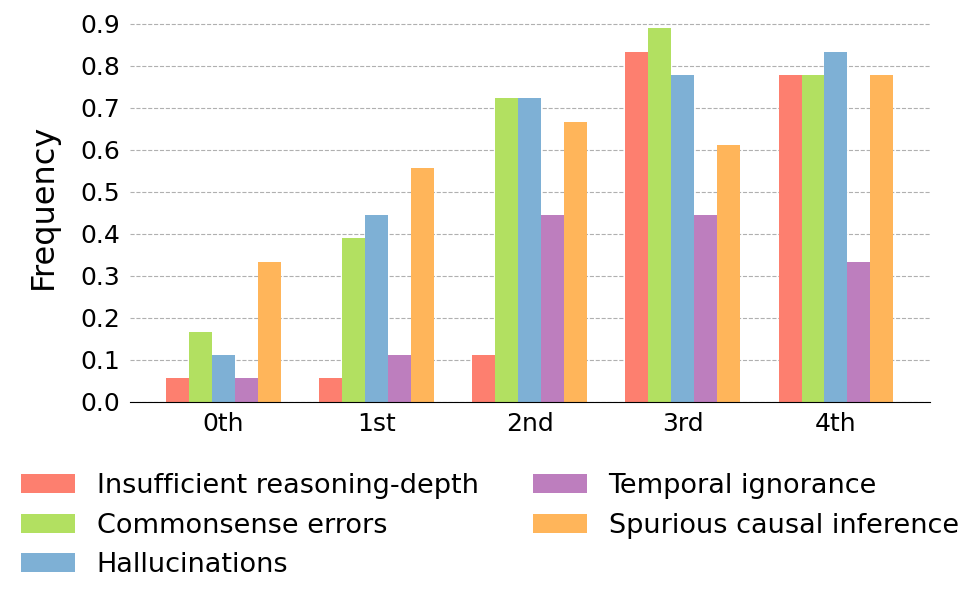

In [16]:
"""Plot: GPT3.5 error types bar plot"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
FONT_SIZE = 23
TICK_SIZE = 18
LEGEND_FONT_SIZE = 19.5

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title

occurrence = ['Last\ncontainer', 'First\ncontainer', 'Other\nplaces']
story_tells = ['Stories w/\ndeception', 'Stories w/o\ndeception']
# cols = ['#7C84B9', (1, 0.851, 0.4), 'steelblue']
cols = ["#fd7f6f", "#b2e061", "#7eb0d5", "#bd7ebe", "#ffb55a", "#00bfa0", "#ffee65", "#fdcce5", "#8bd3c7"]
# cols = [(253, 127, 111), (126, 176, 213), (178, 224, 97), (189, 126, 190), (255, 181, 90), (0, 191, 160), (255, 238, 101), (253, 204, 229), (139, 211, 199)]
error_ratio_chosen_3 = None

error_ratio_chosen_3 = [error_ratio_all_3[i] for i in range(9) if i not in [2, 4, 7]]
pprint.pprint(error_ratio_chosen_3)
# Set the positions of the bars
x = np.arange(5)
width = 0.15

# Create the bar chart
# plt.bar(x - width/2, No_Tell_ratio[0], width, label='No deception', zorder=2, color=cols[0])
# plt.bar(x + width/2, Tell_ratio[0], width, label='Exists deception', zorder=2, color=cols[1])

fig = plt.figure(figsize=(10, 7))
plt.bar(x - 2*width,  error_ratio_chosen_3[1], width, label='Insufficient reasoning-depth', zorder=2, color=cols[0])
plt.bar(x - width, error_ratio_chosen_3[2], width, label='Commonsense errors', zorder=2, color=cols[1])
plt.bar(x, error_ratio_chosen_3[3], width, label='Hallucinations', zorder=2, color=cols[2])
plt.bar(x + width, error_ratio_chosen_3[0], width, label='Temporal ignorance', zorder=2, color=cols[3])
plt.bar(x + 2*width, error_ratio_chosen_3[4], width, label='Spurious causal inference', zorder=2, color=cols[4])

# Add labels and title
# plt.xlabel('ToM order')
plt.ylabel('Frequency', labelpad=15)
plt.grid(axis='y', linestyle='dashed', zorder=1)
# plt.title('Bar Chart with Two Columns')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)

# Set the x-axis tick labels
plt.xticks(x, ['0th', '1st', '2nd', '3rd', '4th'])
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])
plt.tick_params(bottom=False, left=False)

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.45, -0.12), ncol=2, frameon=False)
plt.subplots_adjust(bottom=0.34, top=0.9, left=0.15, right=0.95)

# Display the plot
plt.savefig(f'data_figs/error_types_GPT-3.5.pdf')
plt.show()


In [ ]:
"""Plot: Ratio of correct/incorrect answer in first-container answers"""
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
FONT_SIZE = 18
TICK_SIZE = 15
LEGEND_FONT_SIZE = 17

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=TICK_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=42)  # fontsize of the figure title

titles = ['GPT-4', 'GPT-3.5']
# cols = ['#7C84B9', (1, 0.851, 0.4), 'steelblue']
cols = ["#fd7f6f", "#b2e061", "#7eb0d5", "#bd7ebe", "#ffb55a", "#00bfa0", "#ffee65", "#fdcce5", "#8bd3c7"]
# cols = [(253, 127, 111), (126, 176, 213), (178, 224, 97), (189, 126, 190), (255, 181, 90), (0, 191, 160), (255, 238, 101), (253, 204, 229), (139, 211, 199)]
error_ratio_chosen_3 = None
error_ratio_chosen = None
error_ratio_chosen_3 = [error_ratio_all_3[i] for i in range(9) if i not in [2, 4, 7]]
error_ratio_chosen = [error_ratio_all[i] for i in range(9) if i not in [2, 4, 7]]

# pprint.pprint(error_ratio_chosen_3)
# Set the positions of the bars
x = np.arange(5)
width = 0.15

# Create the bar chart
fig, axs = plt.subplots(1, 2, figsize=(17, 6))
axs[0].bar(x - 2*width,  error_ratio_chosen[1], width, label='Insufficient reasoning depth', zorder=2, color=cols[0])
axs[0].bar(x - width, error_ratio_chosen[2], width, label='Commonsense errors', zorder=2, color=cols[1])
axs[0].bar(x, error_ratio_chosen[3], width, label='Hallucinations', zorder=2, color=cols[2])
axs[0].bar(x + width, error_ratio_chosen[0], width, label='Temporal ignorance', zorder=2, color=cols[3])
axs[0].bar(x + 2*width, error_ratio_chosen[4], width, label='Spurious causal inference', zorder=2, color=cols[4])

axs[1].bar(x - 2*width,  error_ratio_chosen_3[1], width, label='Insufficient reasoning depth', zorder=2, color=cols[0])
axs[1].bar(x - width, error_ratio_chosen_3[2], width, label='Commonsense errors', zorder=2, color=cols[1])
axs[1].bar(x, error_ratio_chosen_3[3], width, label='Hallucinations', zorder=2, color=cols[2])
axs[1].bar(x + width, error_ratio_chosen_3[0], width, label='Temporal ignorance', zorder=2, color=cols[3])
axs[1].bar(x + 2*width, error_ratio_chosen_3[4], width, label='Spurious causal inference', zorder=2, color=cols[4])

# Add labels and title
# plt.xlabel('ToM order')
# plt.ylabel('Frequency')
# plt.title('Bar Chart with Two Columns')
for i in range(2):
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['left'].set_visible(False)
    axs[i].spines['bottom'].set_visible(True)
    axs[i].grid(axis='y', linestyle='dashed', zorder=1)
    axs[i].set_ylim(0,1)
    axs[0].set_ylabel('Frequency', labelpad=17)
    # axs[i].set_xlabel('ToM order')
    axs[i].set_xticks([0,1,2,3,4])
    axs[i].set_yticks([0 ,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    axs[i].tick_params(bottom=False, left=False)
    axs[i].set_title(titles[i], pad=20)

# Add a legend
plt.legend(loc='upper center', bbox_to_anchor=(-0.16, -0.12), ncol=3, frameon=False)
plt.subplots_adjust(bottom=0.34, top=0.9, left=0.15, right=0.95)

# Display the plot
plt.savefig(f'data_figs/error_types.pdf')
plt.show()
